In [2]:
import tensorflow as tf



In [21]:
mnist = tf.keras.datasets.mnist #28x28 images of hand drawn numbers

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
          
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2597 - acc: 0.9239
Epoch 2/3
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1041 - acc: 0.9679
Epoch 3/3
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0716 - acc: 0.9768


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0914 - acc: 0.9719
0.09137611124152317 0.9719


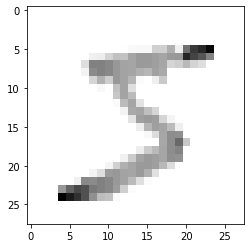

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
#print(x_train[0])
plt.show()

In [16]:
model.save('num_reader.model')

In [ ]:
new_model = tf.keras.models.load_model('num_reader.model')

In [24]:
predictions = new_model.predict(x_test)

print(predictions)

[[9.0894314e-09 1.4180313e-08 8.4262529e-06 ... 9.9990261e-01
  1.5582645e-08 3.5881359e-07]
 [5.5149271e-12 2.9927868e-04 9.9969900e-01 ... 3.1983111e-11
  5.4870497e-08 4.0610167e-13]
 [6.4272044e-08 9.9972302e-01 3.7814752e-05 ... 6.7207191e-05
  1.3693147e-04 2.7857584e-06]
 ...
 [1.7952157e-08 1.9512024e-08 3.3381856e-08 ... 2.0952812e-05
  1.6116292e-06 3.9616709e-05]
 [1.0066692e-06 2.7813218e-08 8.8740872e-09 ... 9.4041699e-09
  6.0663337e-04 2.9510747e-10]
 [1.3113429e-05 2.2510800e-09 6.6555451e-08 ... 4.7003438e-12
  4.7475962e-07 1.1764524e-07]]


AI guessed:  0
Actual number:  6


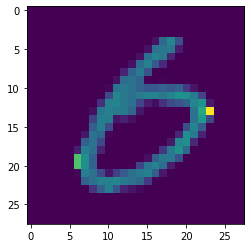

In [70]:
import numpy as np

predict=965

print("AI guessed: ",np.argmax(predictions[predict]))
print("Actual number: ", y_test[predict])
plt.imshow(x_test[predict])
plt.show()

In [60]:
for num in range(1000):
    if np.argmax(predictions[num]) != y_test[num]:
        print(num)

18
149
217
247
259
321
340
391
445
495
522
578
582
610
619
629
684
691
720
740
829
844
882
883
900
938
947
965
